# Atari 2600 Space Invaders project report

### Changes to the code

1. Changed the environment to Space Invaders,  
    ```
    env = gym.make("SpaceInvadersNoFrameskip-v4", render_mode="rgb_array")
    ```
2. Changed number of actions to 6 for Space Invaders and updated the Q-learning model to the one in the assignment,  

    ```
    num_actions = 6

    def create_q_model():
        return keras.Sequential(
            [
                layers.Input(shape=(84,84,4)),
                layers.Conv2D(32, kernel_size=8, strides=4, activation="relu"),
                layers.Conv2D(64, kernel_size=4, strides=2, activation="relu"),
                layers.Conv2D(64, kernel_size=3, strides=1, activation="relu"),
                layers.Flatten(),
                layers.Dense(512, activation="relu"),
                layers.Dense(num_actions, activation="linear")
            ]
        )
    ```
3. Added best score to keep track and only save models that had a better running reward,

    ```
    best_score = 0

    [...]

    if running_reward > best_score:
        best_score = running_reward
        
        model.save(f"space_invaders_qmodel_{episode_count}.keras")
    ```
4. Transposed to match the input shape,
    ```
    state = np.array(observation)
    state = np.transpose(state, (1,2,0))

    [...]

    state_next = np.array(state_next)
    state_next = np.transpose(state_next, (1, 2, 0))
    ```
5. Removed the stopping condition so that I could run it for as long as I wanted and interrupt manually,
    ```
    if running_reward > 40:
        print("Solved at episode {}!".format(episode_count))
        break 
    ```

6. In the evaluation code I removed ```gym.register_envs(ale_py)``` because it is not needed in newer versions of gymnasium
7. In the evaluation code I added score to be able to add a print statement for the score,
    ```
    score = 0

    [...]
    
    while not done:
        [...]
        score += reward

    [...]

    print(f"Final score: {score}")

    ```


### Results after 640000 framecounts

1. The highest final score was 1280 and the best running reward was 254.80.

2. The model fluctuates a lot but shows clear improvements in its best scores over time, with occasional plateaus.

3. The running reward steadily increases, indicating consistent learning and better performance the longer it trains.

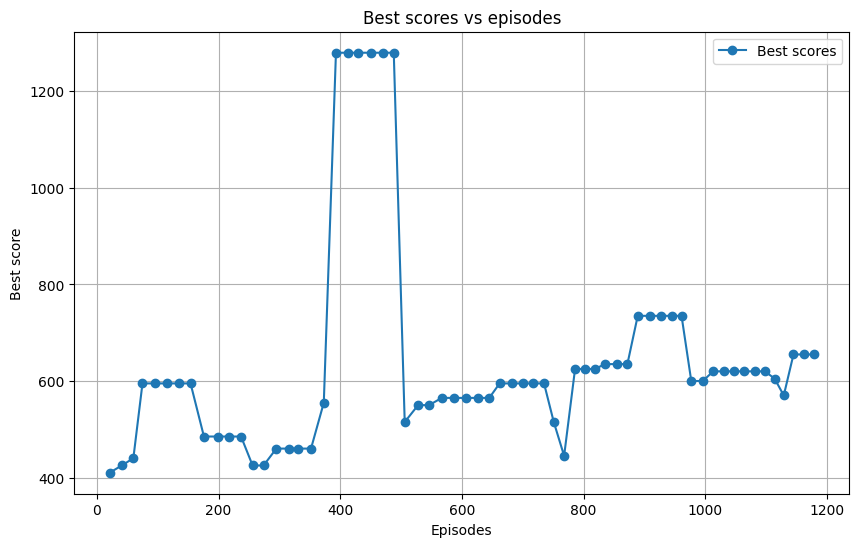

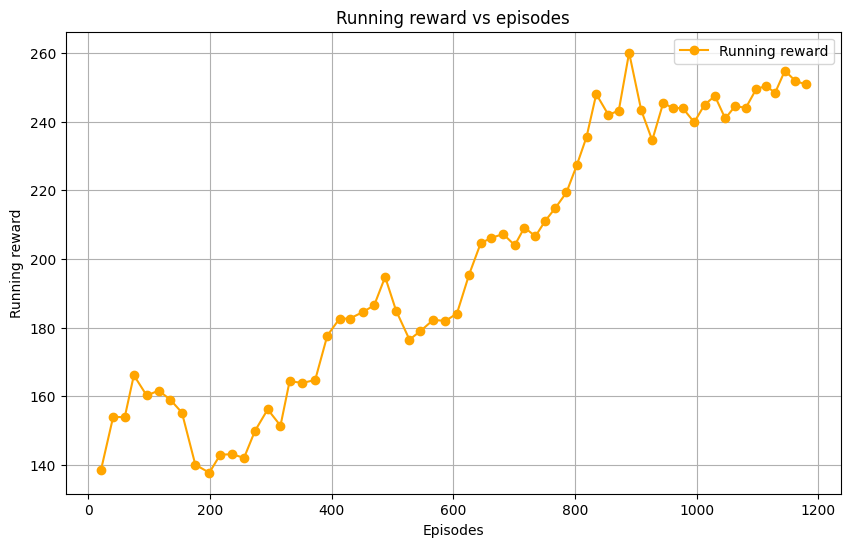

In [ ]:
import matplotlib.pyplot as plt

episodes = [21, 41, 60, 75, 96, 116, 135, 154, 176, 199, 217, 237, 
           256, 274, 295, 316, 331, 352, 373, 393, 413, 430, 451, 
           470, 488, 506, 528, 546, 567, 587, 606, 626, 645, 662, 
           682, 701, 717, 735, 751, 768, 786, 803, 819, 835, 855, 
           872, 889, 909, 927, 945, 961, 977, 996, 1013, 1030, 
           1047, 1063, 1081, 1098, 1114, 1129, 1145, 1162, 1179]

frame_counts = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 
               100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 
               180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 
               260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 
               340000, 350000, 360000, 370000, 380000, 390000, 400000, 410000, 
               420000, 430000, 440000, 450000, 460000, 470000, 480000, 490000, 
               500000, 510000, 520000, 530000, 540000, 550000, 560000, 570000, 
               580000, 590000, 600000, 610000, 620000, 630000, 640000]

best_scores = [410, 425, 440, 595, 595, 595, 595, 595, 485, 485, 
               485, 485, 425, 425, 460, 460, 460, 460, 555, 1280, 
               1280, 1280, 1280, 1280, 1280, 515, 550, 550, 565, 
               565, 565, 565, 565, 595, 595, 595, 595, 595, 515, 
               445, 625, 625, 625, 635, 635, 635, 735, 735, 735, 
               735, 735, 600, 600, 620, 620, 620, 620, 620, 620, 
               605, 570, 655, 655, 655]

running_rewards = [138.57, 154.02, 153.92, 166.13, 160.26, 161.65, 
                   159.00, 155.25, 140.10, 137.75, 143.00, 143.15, 
                   142.05, 149.90, 156.20, 151.45, 164.40, 163.90, 
                   164.75, 177.70, 182.60, 182.65, 184.50, 186.50, 
                   194.75, 184.95, 176.50, 179.00, 182.25, 181.95, 
                   184.10, 195.45, 204.55, 206.10, 207.25, 204.00, 
                   209.15, 206.60, 211.05, 214.90, 219.35, 227.30, 
                   235.50, 248.00, 241.95, 243.20, 260.05, 243.25, 
                   234.55, 245.40, 243.95, 243.95, 239.80, 244.90, 
                   247.45, 240.90, 244.45, 244.05, 249.50, 250.35, 
                   248.40, 254.80, 251.90, 250.80]

# Best scores vs episodes
plt.figure(figsize=(10, 6))
plt.plot(episodes, best_scores, marker='o', linestyle='-', label='Best scores')
plt.title("Best scores vs episodes")
plt.xlabel("Episodes")
plt.ylabel("Best score")
plt.legend()
plt.grid()
plt.show()

# Running reward vs episodes
plt.figure(figsize=(10, 6))
plt.plot(episodes, running_rewards, marker='o', linestyle='-', color='orange', label='Running reward')
plt.title("Running reward vs episodes")
plt.xlabel("Episodes")
plt.ylabel("Running reward")
plt.legend()
plt.grid()
plt.show()